In [1]:
import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(X_train, y_train),(X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
tf.__version__

'2.5.0'

In [3]:
y_train_hot = to_categorical(y_train, num_classes=10)
y_test_hot = to_categorical(y_test, num_classes=10)

In [8]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Reshape, Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.losses import categorical_crossentropy

In [22]:
in_layer = Input(shape = (28, 28))
reshape = Reshape((28, 28, 1))(in_layer)
c1 = Conv2D(32, (3,3))(reshape)
p1 = MaxPooling2D((2, 2))(c1)
c2 = Conv2D(64, (3,3))(p1)
p2 = MaxPooling2D((2, 2))(c2)
flat = Flatten()(p2)
d1 = Dense(1000, activation="tanh")(flat)
d2 = Dense(200, activation="tanh")(d1)
d3 = Dense(50, activation="tanh")(d2)
out = Dense(10, activation="softmax")(d3)

In [23]:
model = Model(in_layer, out)

In [24]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape_4 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0   

In [25]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [26]:
model.fit(X_train, y_train_hot, epochs=10, steps_per_epoch=10)

Epoch 1/10
10/10 [==============================] - 1s 49ms/step - loss: 1.6434 - accuracy: 0.5324
Epoch 2/10
10/10 [==============================] - 0s 49ms/step - loss: 0.5780 - accuracy: 0.8814
Epoch 3/10
10/10 [==============================] - 0s 48ms/step - loss: 0.3026 - accuracy: 0.9306
Epoch 4/10
10/10 [==============================] - 0s 48ms/step - loss: 0.2023 - accuracy: 0.9521
Epoch 5/10
10/10 [==============================] - 0s 49ms/step - loss: 0.1500 - accuracy: 0.9653
Epoch 6/10
10/10 [==============================] - 0s 50ms/step - loss: 0.1175 - accuracy: 0.9738
Epoch 7/10
10/10 [==============================] - 0s 49ms/step - loss: 0.0962 - accuracy: 0.9790
Epoch 8/10
10/10 [==============================] - 0s 50ms/step - loss: 0.0800 - accuracy: 0.9835
Epoch 9/10
10/10 [==============================] - 0s 50ms/step - loss: 0.0678 - accuracy: 0.9869
Epoch 10/10
10/10 [==============================] - 0s 49ms/step - loss: 0.0584 - accuracy: 0.9891


In [27]:
model.evaluate(X_test, y_test_hot)

313/313 [==============================] - 1s 2ms/step - loss: 0.0718 - accuracy: 0.9823


[0.07177340239286423, 0.9822999835014343]

In [28]:
from tensorflow.keras.preprocessing.image import load_img

In [29]:
import numpy as np

In [57]:
arr = np.array(load_img("./twosmall.png", target_size=(28, 28), grayscale=True))

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [58]:
import matplotlib.pyplot as plt

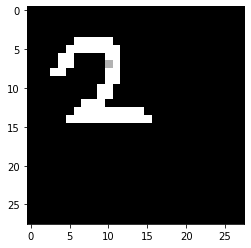

In [59]:
plt.imshow(255-arr, cmap="gray")

In [60]:
test = 255-arr

In [61]:
res = model.predict(np.array([test]))

In [62]:
res.argmax(axis=1)

array([4])